In [59]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [60]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [61]:
train='dataset/train/'

In [62]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [63]:
val='dataset/train/'

In [64]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [65]:
test='dataset/test/'

In [66]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [67]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [68]:
train_data.class_names = class_names
val_data.class_names = class_names

In [69]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


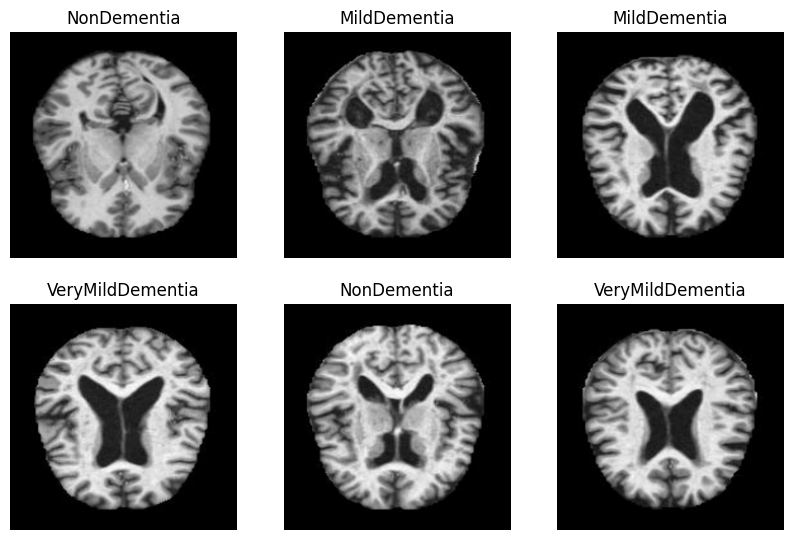

In [70]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [72]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 
import scipy

In [73]:
vgg = VGG19(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

In [74]:
for layer in vgg.layers:
    layer.trainable = False

In [75]:
x = Flatten()(vgg.output)

In [76]:
import glob

In [77]:
folders = glob.glob(f'dataset/train/*')

In [78]:
print(len(folders))

4


In [79]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [80]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [81]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [82]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
129/129 [==============================] - 77s 478ms/step - loss: 2.8346 - accuracy: 0.5270 - val_loss: 1.6912 - val_accuracy: 0.5820
Epoch 2/50
129/129 [==============================] - 60s 462ms/step - loss: 1.2452 - accuracy: 0.6627 - val_loss: 1.2325 - val_accuracy: 0.6914
Epoch 3/50
129/129 [==============================] - 59s 458ms/step - loss: 0.7915 - accuracy: 0.7503 - val_loss: 1.0433 - val_accuracy: 0.6953
Epoch 4/50
129/129 [==============================] - 60s 464ms/step - loss: 0.4721 - accuracy: 0.8328 - val_loss: 0.7320 - val_accuracy: 0.7686
Epoch 5/50
129/129 [==============================] - 60s 464ms/step - loss: 0.3497 - accuracy: 0.8763 - val_loss: 0.6310 - val_accuracy: 0.7949
Epoch 6/50
129/129 [==============================] - 60s 461ms/step - loss: 0.2232 - accuracy: 0.9138 - val_loss: 0.5595 - val_accuracy: 0.8184
Epoch 7/50
129/129 [==============================] - 60s 464ms/step - loss: 0.1580 - accuracy: 0.9429 - val_loss: 0.5654 - val_ac

In [83]:
model.save("weight_5.h5")

In [84]:
model.evaluate(val_data)

32/32 [==============================] - 10s 294ms/step - loss: 0.2696 - accuracy: 0.9209


[0.26964935660362244, 0.9208984375]

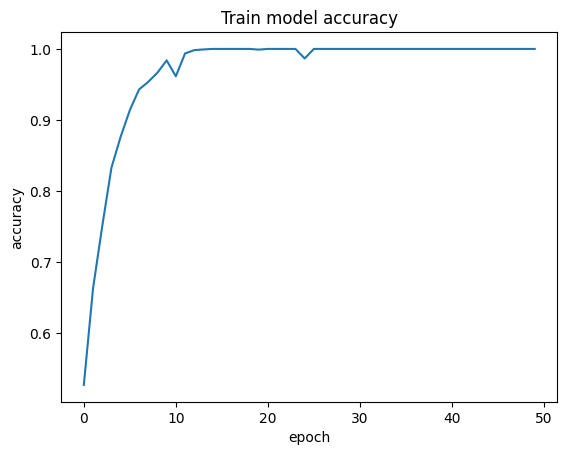

In [85]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

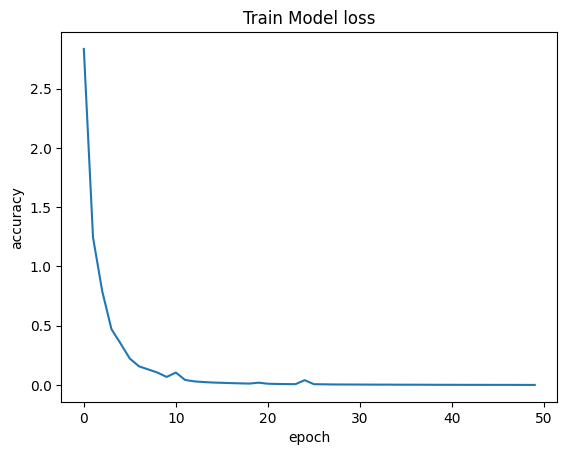

In [86]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

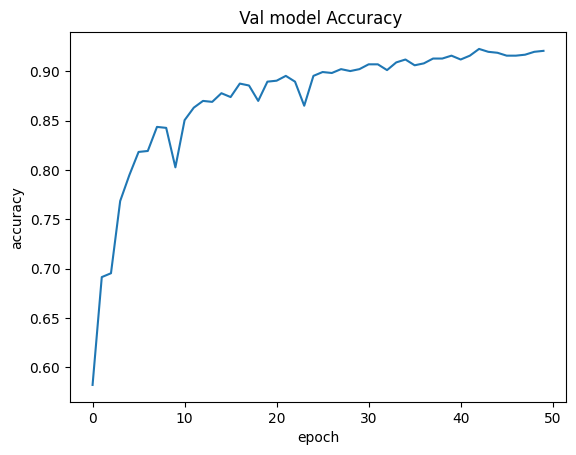

In [87]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

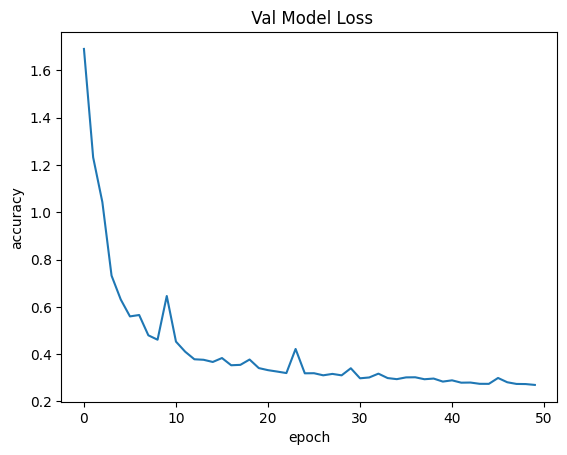

In [88]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

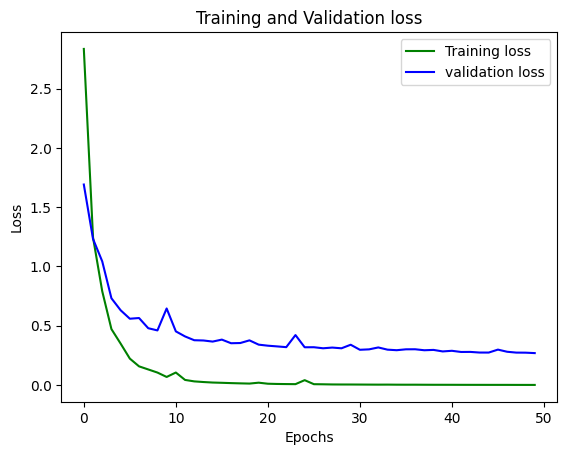

In [89]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

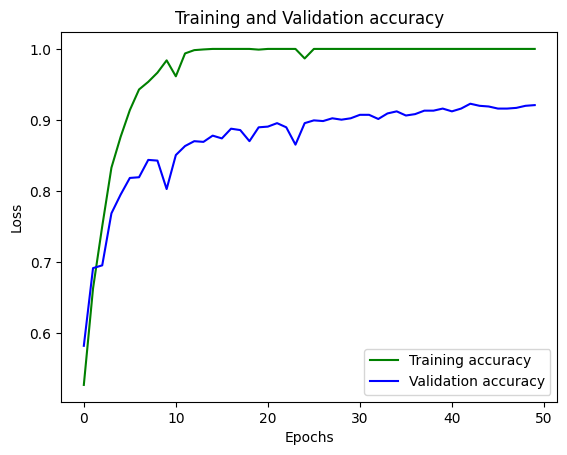

In [90]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
class_names={0:"MildDementia", 1:"ModerateDementia", 2:"NonDementia", 3:"VeryMildDementia"}

In [92]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Mild Dementia")
        elif p==1:
            print("Predicted Image: Moderate Dementia")
        elif p==2:
            print("Predicted Image: Non Dementia")
        else:
            print("Predicted Image: Very Mild Dementia")
        
        print("Predicted class:",p)

True_class: VeryMildDementia
Predicted Image: Very Mild Dementia
Predicted class: 3
True_class: MildDementia
Predicted Image: Mild Dementia
Predicted class: 0
True_class: NonDementia
Predicted Image: Non Dementia
Predicted class: 2
True_class: VeryMildDementia
Predicted Image: Non Dementia
Predicted class: 2
True_class: MildDementia
Predicted Image: Mild Dementia
Predicted class: 0
True_class: VeryMildDementia
Predicted Image: Very Mild Dementia
Predicted class: 3
